# CpE Elective 3 Laboratory (LBYCPC4) <br/>
#### Computer Vision and Deep Learning Elective Track
<br/>
<hr style="border:5px solid gray">


## Activity 1: Autoencoders

### Introduction
&emsp;&emsp;&emsp;Autoencoders are a type of neural network that are trained to learn a compressed representation of input data. They are used to reduce dimensionality, denoise data, and even generate new data. The goal of training an autoencoder is to minimize the reconstruction error, meaning the difference between the original input and the reconstructed output should be as small as possible. This forces the autoencoder to learn a meaningful and efficient representation of the data.

Although reconstructing the data might seem like a trivial matter by simply copying the data forward from one layer to another, this is not possible when the number of units in the middle are constricted. In other words, the number of units in each middle layer is typically fewer than that in the input (or
output). As a result, these units hold a reduced representation of the data, and the final layer can no longer reconstruct the data exactly [1]. This general representation of the autoencoder is illustrated in Figure 1.1.

<center><img src="https://drive.google.com/uc?export=view&id=1N_RUjBNfnFI19Ll9UrMNmEg7phGRPu3W"><br/>Figure 1.1. The encoder neural network architecture [1]</center>

### Objectives
- Understand the working principle and architecture of autoencoders
- Build and train an autoencoder using deep learning framework
- Visualize the output of an autoencoder
- Assess the performance of the implemented autoencoder

### Activity
*Note: Before starting the activity, make sure to save a copy of this Colaboratory notebook first in your own Google Drive. To do so, go to File > Save a copy in Drive*

**A. Dimensionality Reduction with Autoencoders**

1. Write the code that will download the [Wine Dataset from UCI ML Repository](https://archive.ics.uci.edu/dataset/109/wine). Perform feature normalization using `MinMaxScaler` from Scikit-Learn library. Then, do a train-test split of the normalized dataset with 20% of the data for testing.

In [ ]:
!pip install ucimlrepo

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the Wine dataset as a Numpy array
# Perform feature normalization using MinMaxScaler
# Perform train-test split with 20% test data
# Save the training data to variable X_train
# Save the testing data to variable X_test
# Save the target to variable y

from ucimlrepo import fetch_ucirepo

# Fetch dataset
wine = fetch_ucirepo(id=109)

X = wine.data.features.to_numpy()
y = wine.data.targets.to_numpy()

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


2. Build an autoencoder with the architecture illustrated below. Use the Keras `Sequential` object to build it.
<center><img src="https://drive.google.com/uc?export=view&id=128exLfIE21H2PVoz5w5qZn-9lESgzTFK"></center>

In [ ]:
# Import functions and classes from Keras library
from keras import Input
from keras.models import Sequential
from keras.layers import Dense
from keras import activations

# Create the autoencoder model based from the illustrated model plot
# Save the model as autoencoder_ann variable

autoencoder_ann = Sequential()
autoencoder_ann.add(Input(shape=(13,)))
autoencoder_ann.add(Dense(3, activation = activations.sigmoid))
autoencoder_ann.add(Dense(13, activation = activations.sigmoid))

autoencoder_ann.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94 (376.00 B)

 Trainable params: 94 (376.00 B)

 Non-trainable params: 0 (0.00 B)

3. Configure the network for training with the Adam optimizer and the loss to mean squared error. Then train the model with a batch size of 10. Use the test data for validation during training. Make sure to save the history of losses per training and validation epoch. Train the model until the validation loss is no more than 0.7.

In [ ]:
# Configure the network for training using the compile method
# Set the optimizer to Adam and determine the appropriate loss function

autoencoder_ann.compile(
    optimizer = 'Adam',
    loss='mse'
)

# Train the model using X_train. Use validation with X_test
# Set the batch size to 10 and the verbosity to 2.
# Ensure the validation loss to be no greater than 0.02
# Use early stopping to determine the appropriate training epochs
# Assign the output to hist_autoencoder_ann variable

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.02)

hist_autoencoder_ann = autoencoder_ann.fit(
    X_train, X_train,
    epochs = 1000,
    validation_data = (X_test, X_test),
    verbose = 2,
    batch_size = 10,
    callbacks = [es]
)


Epoch 1/1000
15/15 - 3s - 193ms/step - loss: 0.0568 - val_loss: 0.0621
Epoch 2/1000
15/15 - 0s - 12ms/step - loss: 0.0547 - val_loss: 0.0601
Epoch 3/1000
15/15 - 0s - 20ms/step - loss: 0.0529 - val_loss: 0.0584
Epoch 4/1000
15/15 - 0s - 18ms/step - loss: 0.0512 - val_loss: 0.0569
Epoch 5/1000
15/15 - 0s - 8ms/step - loss: 0.0498 - val_loss: 0.0556
Epoch 6/1000
15/15 - 0s - 6ms/step - loss: 0.0486 - val_loss: 0.0545
Epoch 7/1000
15/15 - 0s - 6ms/step - loss: 0.0475 - val_loss: 0.0534
Epoch 8/1000
15/15 - 0s - 9ms/step - loss: 0.0465 - val_loss: 0.0525
Epoch 9/1000
15/15 - 0s - 6ms/step - loss: 0.0457 - val_loss: 0.0516
Epoch 10/1000
15/15 - 0s - 9ms/step - loss: 0.0449 - val_loss: 0.0509
Epoch 11/1000
15/15 - 0s - 7ms/step - loss: 0.0442 - val_loss: 0.0503
Epoch 12/1000
15/15 - 0s - 9ms/step - loss: 0.0436 - val_loss: 0.0497
Epoch 13/1000
15/15 - 0s - 6ms/step - loss: 0.0430 - val_loss: 0.0492
Epoch 14/1000
15/15 - 0s - 7ms/step - loss: 0.0425 - val_loss: 0.0488
Epoch 15/1000
15/15 - 0s

4. Plot the training and validation loss per epoch. Place appropriate plot title and axis labels.

Text(0.5, 1.0, 'Training Validation Loss per Epoch')

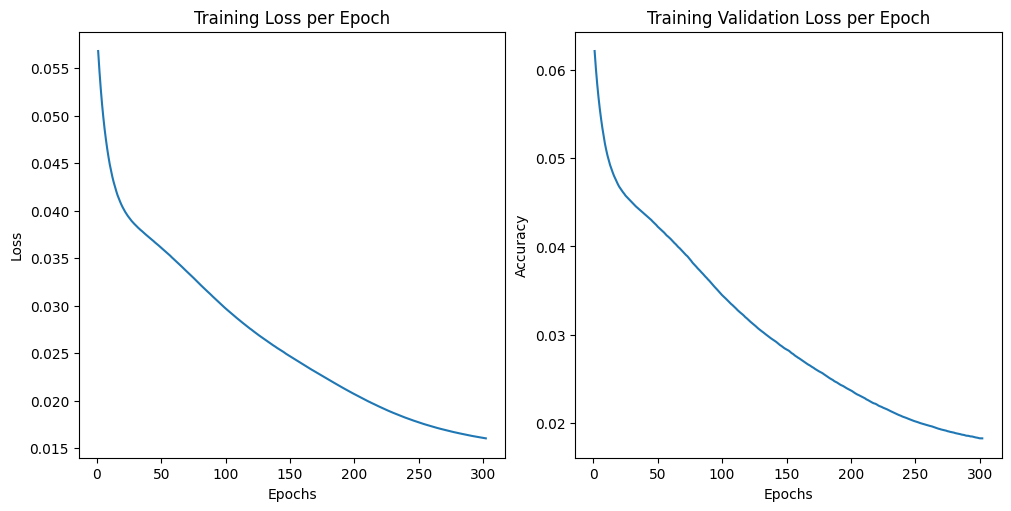

In [ ]:
# Extract the losses during training and validation
losses = hist_autoencoder_ann.history["loss"]
validation_losses = hist_autoencoder_ann.history["val_loss"]
epochs = range(1, len(losses) + 1)

# Plot the history of training and validation losses
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
plt.plot(epochs, losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")

plt.subplot(1,2,2)
plt.plot(epochs, validation_losses)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Validation Loss per Epoch")

5. Extract the encoder subnetwork from the autoencoder. Obtain the output of the encoder for each dataset sample.

In [ ]:
# Extract the encoder subnetwork
encoder_ann = Sequential(autoencoder_ann.layers[:1])

# Obtain the output of the encoder for each dataset sample
# Save the results to X_encoded variable
# The results should include both training and testing data

# X_test_encoded = encoder_ann.predict(X_test)
# X_train_encoded = encoder_ann.predict(X_train)

# X_encoded = np.vstack((X_test_encoded, X_train_encoded))
X_encoded = encoder_ann.predict(X_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


6. Execute the code below to obtain a 3D plot of the values returned by the encoder for each dataset sample. Can you distinguish the clusters? Analyze the plot and write observations on the final report.

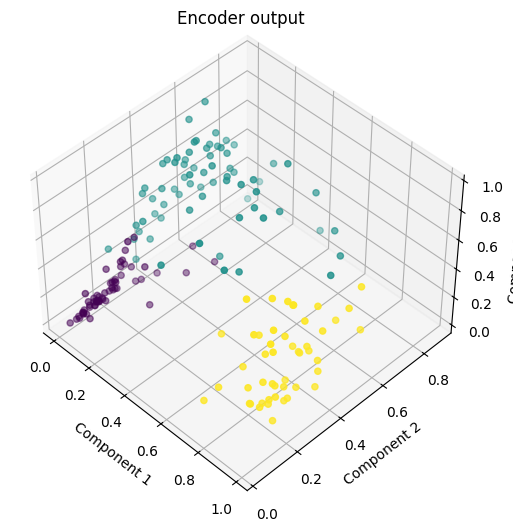

In [ ]:
# Create a 3D plot of the encoder predictions for each dataset point
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=45, azim=-45)
ax.scatter(
    X_encoded[:, 0],
    X_encoded[:, 1],
    X_encoded[:, 2],
    c=y,
    s=20
)

# Set titles and axis labels
ax.set_title("Encoder output")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.show()

7. Execute the code below to perform principal component analysis (PCA) and write the code to plot the transformed datapoints with the first three (3) PCA dimensions. Compare this plot with step A.6. Write your observations on the final report.

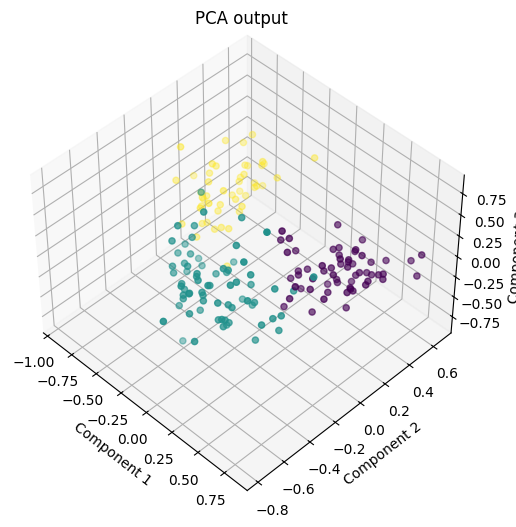

In [ ]:
# Import PCA from Scikit-Learn
from sklearn.decomposition import PCA

# X_PCA = PCA(n_components=3).fit_transform(np.vstack((X_train, X_test)))
X_PCA = PCA(n_components=3).fit_transform(X_scaled)

# Create a 3D plot of the PCA components for each dataset point
# Put appropriate title and axis labels

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=45, azim=-45)
ax.scatter(
    X_PCA[:, 0],
    X_PCA[:, 1],
    X_PCA[:, 2],
    c=y,
    s=20
)

# Set titles and axis labels
ax.set_title("PCA output")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

plt.show()


8. Create another autoencoder model but with only two (2) nodes in the middle. Repeat steps A.3 to A.6. This time, create 2D plots instead of 3D plots to visualize the encoder subnetwork outputs. Is the final validation loss better than the previous model? Can the model clearly separate the targets into distinguishable clusters? Write your observations in the final report.

In [ ]:
# Define another autoencoder with 2 nodes at hidden layer

autoencoder_ann_2 = Sequential()
autoencoder_ann_2.add(Input(shape=(13,)))
autoencoder_ann_2.add(Dense(2, activation = activations.sigmoid))
autoencoder_ann_2.add(Dense(13, activation = activations.sigmoid))

autoencoder_ann_2.summary()

# Configure and train the network

autoencoder_ann_2.compile(
    optimizer = 'Adam',
    loss='mse',
)

es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.02)

hist_autoencoder_ann_2 = autoencoder_ann_2.fit(
    X_train, X_train,
    epochs = 1000,
    validation_data = (X_test, X_test),
    verbose = 2,
    batch_size = 10,
    callbacks = [es]
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
15/15 - 2s - 161ms/step - loss: 0.0530 - val_loss: 0.0563
Epoch 2/1000
15/15 - 1s - 50ms/step - loss: 0.0520 - val_loss: 0.0554
Epoch 3/1000
15/15 - 0s - 10ms/step - loss: 0.0510 - val_loss: 0.0546
Epoch 4/1000
15/15 - 0s - 6ms/step - loss: 0.0502 - val_loss: 0.0538
Epoch 5/1000
15/15 - 0s - 6ms/step - loss: 0.0493 - val_loss: 0.0531
Epoch 6/1000
15/15 - 0s - 9ms/step - loss: 0.0485 - val_loss: 0.0524
Epoch 7/1000
15/15 - 0s - 10ms/step - loss: 0.0477 - val_loss: 0.0518
Epoch 8/1000
15/15 - 0s - 22ms/step - loss: 0.0470 - val_loss: 0.0512
Epoch 9/1000
15/15 - 0s - 19ms/step - loss: 0.0464 - val_loss: 0.0506
Epoch 10/1000
15/15 - 0s - 21ms/step - loss: 0.0457 - val_loss: 0.0501
Epoch 11/1000
15/15 - 0s - 20ms/step - loss: 0.0451 - val_loss: 0.0496
Epoch 12/1000
15/15 - 0s - 12ms/step - loss: 0.0445 - val_loss: 0.0491
Epoch 13/1000
15/15 - 0s - 10ms/step - loss: 0.0440 - val_loss: 0.0487
Epoch 14/1000
15/15 - 0s - 7ms/step - loss: 0.0435 - val_loss: 0.0482
Epoch 15/1000
15/1

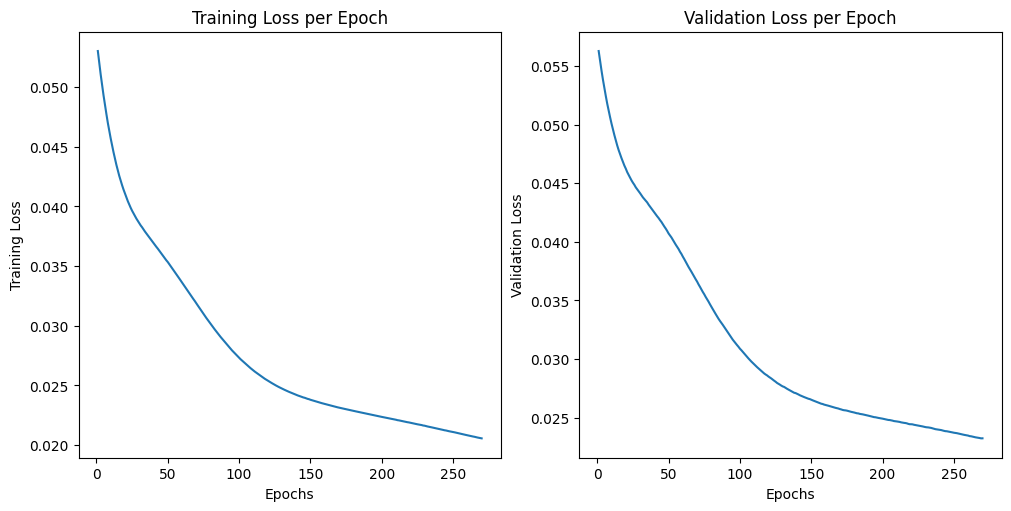

In [ ]:
# Plot the history of training and validation losses

losses = hist_autoencoder_ann_2.history["loss"]
validation_losses = hist_autoencoder_ann_2.history["val_loss"]
epochs = range(1, len(losses) + 1)

# Plot the history of training and validation losses
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
plt.plot(epochs, losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss per Epoch")

plt.subplot(1, 2, 2)
plt.plot(epochs, validation_losses)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss per Epoch")
plt.show()

In [ ]:
# Obtain the output of the encoder for each dataset sample

encoder_ann_2 = Sequential(autoencoder_ann.layers[:1])
X_encoded_2 = encoder_ann.predict(X_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


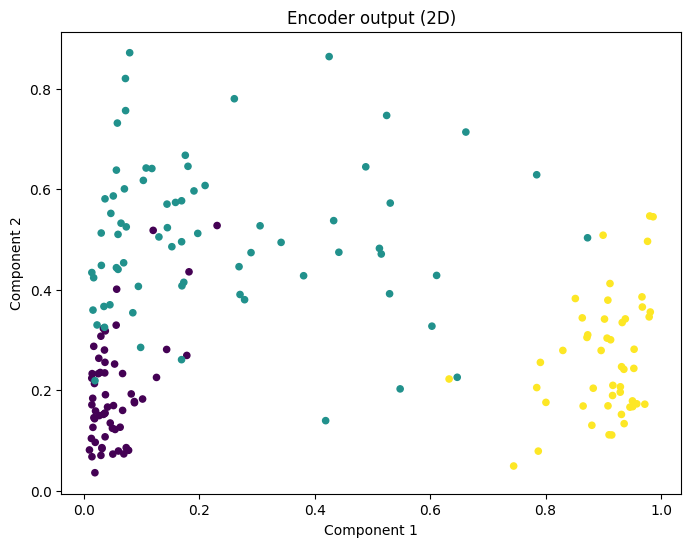

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_encoded_2[:, 0],
    X_encoded_2[:, 1],
    c=y,
    s=20
)

plt.title("Encoder output (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

**B. Building a Denoising Convolutional Autoencoder**

1. Write the code that will download and display at least ten (10) samples of the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset.

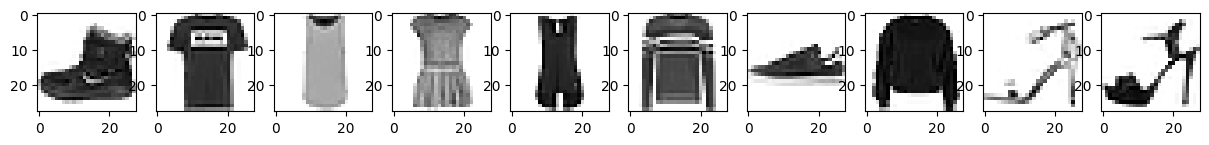

In [ ]:
# Import functions and classes
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Load the Fashion MNIST dataset
# Rescale the pixel values to be between 0 and 1
# Save the training images and labels to x_train and y_train variables
# Save the testing images and labels to x_test and y_test variables
# Plot ten (10) images from training set in a single row

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

fig, axes = plt.subplots(1, 10, figsize=(15,2))
for i, ax in enumerate(axes):
  ax.imshow(x_train[i], cmap='binary')
plt.show()

2. Execute the code below to generate a copy of noisy images and display the images.

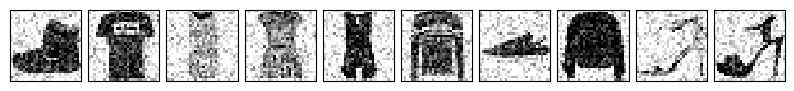

In [ ]:
# Apply noise to the image
x_train_noisy = x_train + 0.2*np.random.normal(loc=0, scale=1,
                                               size=x_train.shape)
x_test_noisy = x_test + 0.2*np.random.normal(loc=0, scale=1,
                                             size=x_test.shape)

# Ensure that all pixel values are within the range
x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Plot ten (10) noisy images from training set in a single row
fig, axes = plt.subplots(1, 10, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(x_train_noisy[i], cmap='binary', interpolation='none')

3. Build a denoising autoencoder with the architecture illustrated below.
<center><img src="https://drive.google.com/uc?export=view&id=1KaLOal7SSsvdIySh5rFw3sd0CwanGQDX"></center>

In [ ]:
# Import functions and classes
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import Input
from keras.models import Model

# Create the autoencoder model based from the illustrated model plot
# Save the model as autoencoder_cnn variable
input_img = Input(shape=(28, 28, 1))

encoder = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
encoder = MaxPooling2D((2,2), padding='same')(encoder)
encoder = Conv2D(32, (3,3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2,2), padding='same')(encoder)
encoder = Conv2D(32, (3,3), activation='relu', padding='same')(encoder)

decoder = UpSampling2D((2,2))(encoder)
decoder = Conv2D(32, (3,3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoder)

autoencoder_cnn = Model(input_img, decoded)
autoencoder_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

4. Configure the network for training with the appropriate loss function and an optimizer of your choice. Then train the model with a batch size of 100. Perform validation during training. Make sure to save the history of losses per training and validation epoch.

In [ ]:
# Configure the network for training
autoencoder_cnn.compile(
    optimizer='Adam',
    loss='mse'
)

# Train the model. Perform validation as well
# Set the batch size to 100 and the verbosity to 2
# Ensure the validation loss to be no greater than 0.01
# Use early stopping to determine the appropriate training epochs
# Assign the output to hist_autoencoder_cnn variable
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    baseline = 0.01
)

hist_autoencoder_cnn = autoencoder_cnn.fit(
    x_train_noisy, x_train,
    epochs=500,
    batch_size=100,
    validation_data=(x_test_noisy, x_test),
    verbose=2,
    callbacks=[es]
)


Epoch 1/500
600/600 - 7s - 12ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 2/500
600/600 - 7s - 12ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 3/500
600/600 - 3s - 5ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 4/500
600/600 - 5s - 8ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 5/500
600/600 - 3s - 5ms/step - loss: 0.0066 - val_loss: 0.0068


5. Plot the training and validation loss per epoch. Place appropriate plot title and axis labels.

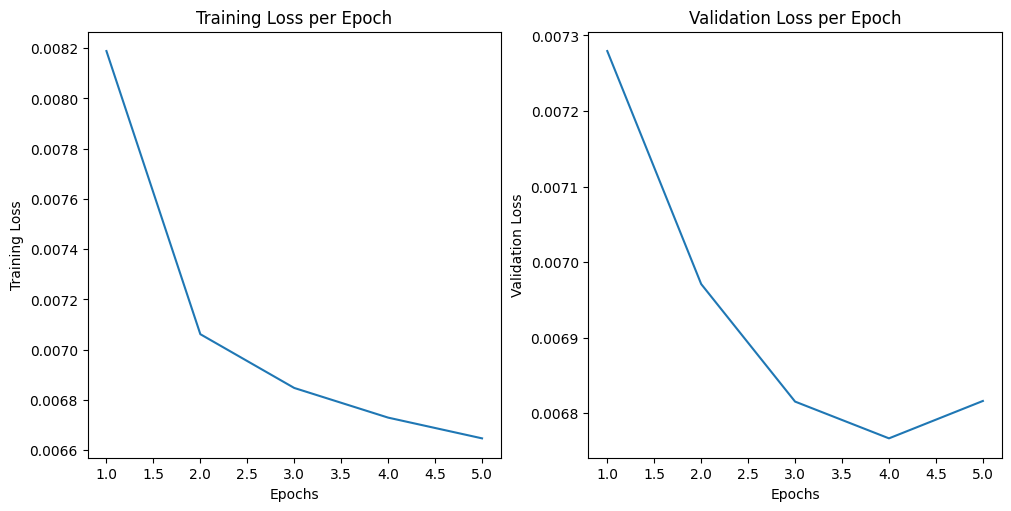

In [ ]:
# Extract the losses during training and validation
losses = hist_autoencoder_cnn.history["loss"]
validation_losses = hist_autoencoder_cnn.history["val_loss"]
epochs = range(1, len(losses) + 1)

# Plot the history of training and validation losses
plt.figure(figsize=(10, 5), constrained_layout=True)
plt.subplot(1, 2, 1)
plt.plot(epochs, losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss per Epoch")

plt.subplot(1, 2, 2)
plt.plot(epochs, validation_losses)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss per Epoch")
plt.show()

6. Obtain the model output for at least ten (10) noisy test images. Display the input images in the first row and the output images in the second row.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


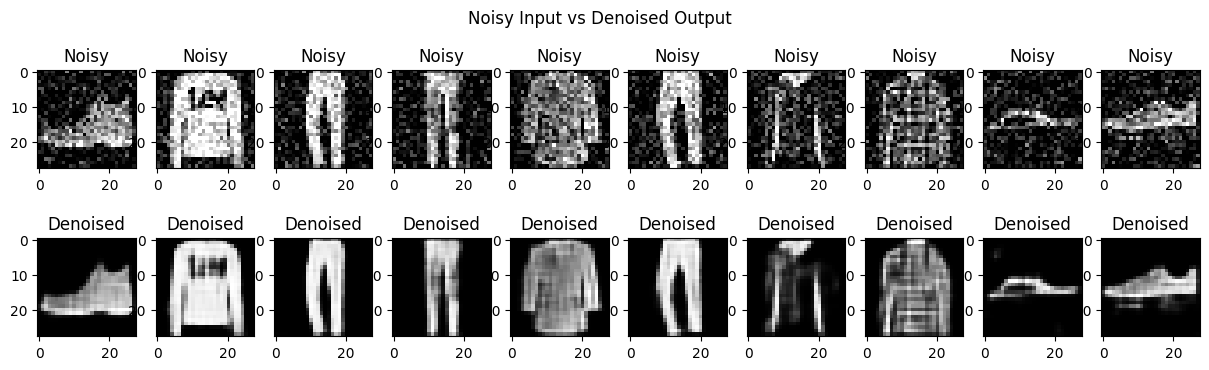

In [ ]:
# Obtain model output for ten (10) input noisy images
# Display both the input noisy images and the output denoised image in two rows
# The first row contains the input noisy images
# The second row contains the output denoised images

denoised_images = autoencoder_cnn.predict(x_test_noisy[:10])

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
  axes[0,i].imshow((x_test_noisy[i]).reshape(28,28), cmap='gray')
  axes[0,i].set_title("Noisy")

  axes[1,i].imshow((denoised_images[i]).reshape(28,28), cmap='gray')
  axes[1,i].set_title("Denoised")

plt.suptitle("Noisy Input vs Denoised Output")
plt.show()

7. For each test image, measure the error of the reconstruction between the original (prior to applying noise) image and the denoised (model output for noisy input) image. Research an appropriate  error measure between these images and justify it in your final report. Furthermore, take the average of errors across all test images and put the value in your final report.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Average MSE: 0.006816227558383252


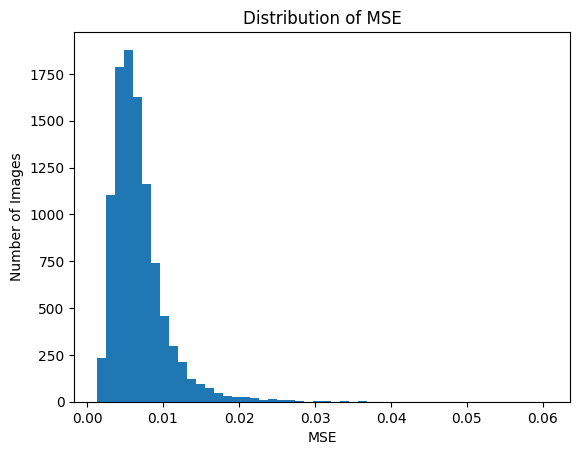

In [ ]:
from sklearn.metrics import mean_squared_error

decoded_images = autoencoder_cnn.predict(x_test_noisy)

errors = []
for i in range(len(x_test)):
  mse = mean_squared_error(
      x_test[i].reshape(-1),
      decoded_images[i].reshape(-1)
  )
  errors.append(mse)

errors = np.array(errors)
avg_error = np.mean(errors)

print("Average MSE:", avg_error)

plt.hist(errors, bins=50)
plt.title("Distribution of MSE")
plt.xlabel("MSE")
plt.ylabel("Number of Images")
plt.show()

8. Look for at least five (5) images of clothing converted to normalized grayscale images and with the same size as the training dataset. Apply noise as done in task B.2. Obtain the predictions and display the input images in the first row and the output images in the second row. Put the results and write  observations in the final report.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


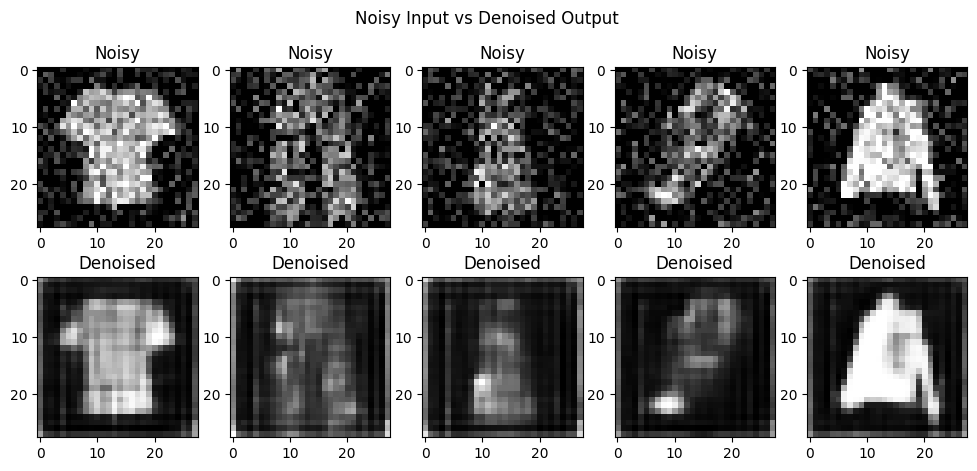

In [ ]:
import requests
from PIL import Image
from io import BytesIO

clothing_urls = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSi98xDGdfq9g4Ew8T5FHHWDEXm3Gd3M3Reew&s",  # T-shirt
    "https://t3.ftcdn.net/jpg/02/62/60/96/360_F_262609650_4PKM4OYULWGkrRrM2axh3XgtjYm7z6dt.jpg",     # Jeans
    "https://www.shutterstock.com/image-photo/ghost-mannequin-dress-without-human-600nw-2316338487.jpg",     # Dress
    "https://www.shutterstock.com/image-photo/single-colorful-sport-sneaker-isolated-260nw-2473467559.jpg",     # Sneakers
    "https://img.freepik.com/premium-photo/mens-black-leather-jacket-isolated-white-background_125604-204.jpg"   # Jacket
]

x_external = []
for url in clothing_urls:
  response = requests.get(url, timeout=10)
  img = Image.open(BytesIO(response.content))
  img = img.convert("L")
  img = img.resize((28, 28))
  img_array = np.array(img) / 255.0
  x_external.append(img_array.reshape(28, 28))

x_external = np.array(x_external)

# Apply noise as done in task B.2
x_external_noisy = x_external + 0.2 * np.random.normal(
    loc=0, scale=1, size=x_external.shape
)
x_external_noisy = np.clip(x_external_noisy, 0, 1)

decoded_external = autoencoder_cnn.predict(x_external_noisy)

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(5):
    axes[0, i].imshow(x_external_noisy[i].reshape(28, 28), cmap="binary")
    axes[0, i].set_title("Noisy")

    axes[1, i].imshow(decoded_external[i].reshape(28, 28), cmap="binary")
    axes[1, i].set_title("Denoised")

plt.suptitle("Noisy Input vs Denoised Output")
plt.show()

***

### Machine Problems


### References

[1] Aggarwal, Charu C. *Neural Networks and Deep Learning : A Textbook*. 2nd ed. Cham: Springer International Publishing, 2023.

[2] I. Goodfellow, Y. Bengio and A. Courville, *Deep Learning*. MIT Press, 2016.

[3] *Keras 3 API documentation*. https://keras.io/api/

[4] *Wine Dataset*. https://archive.ics.uci.edu/dataset/109/wine

[5] *Fashion MNIST*. https://github.com/zalandoresearch/fashion-mnist